In [11]:
import xarray as xr
import numpy as np

nh3_nc = xr.load_dataset('../datasets/CAMS-GLOB-ANT_Glb_0.1x0.1_anthro_nh3_v4.2_monthly_lombardia.nc') # Copernicus (0.1°x0.1°)

In [12]:
to_pedix = str.maketrans("3", "₃")

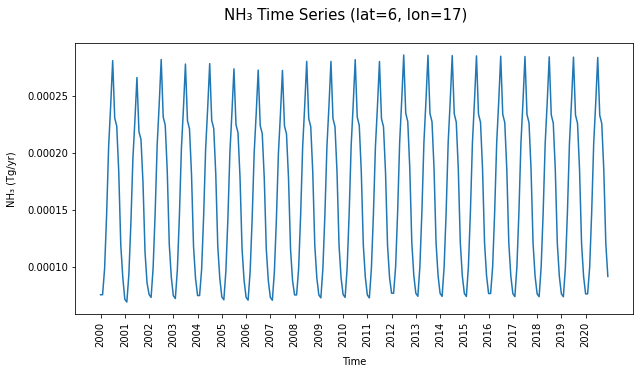

In [13]:
from utils import utils
import matplotlib.pyplot as plt

lat, lon = (6, 17)

nh3 = utils.xarray2pandas(nh3_nc.agl, lat, lon)

fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Time', labelpad=10)
ax.set_ylabel('NH3 (Tg/yr)'.translate(to_pedix), labelpad=10)

indices = np.arange(0, len(nh3), 12)

ticks = [date.year for date in nh3.index]

ax.set_xticks(indices)
ax.set_xticklabels(np.array(ticks)[indices], rotation=90)

fig.suptitle('NH3 Time Series (lat={}, lon={})'.translate(to_pedix).format(lat, lon), fontsize=15)

ax.plot(nh3.values)
plt.show()

Distribuzione di probabilità

In [14]:
from utils.plots import plot_distributions

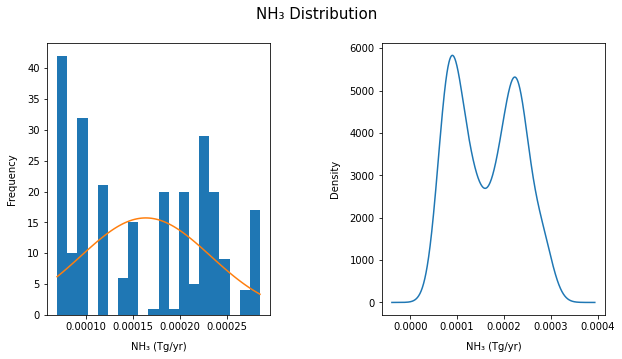

In [17]:
xlabel = ['NH3 (Tg/yr)'.translate(to_pedix), 'NH3 (Tg/yr)'.translate(to_pedix)]
title = 'NH3 Distribution'.translate(to_pedix)

plot_distributions(nh3, title, xlabel)

H0 : dati provenienti da distribuzione gaussiana

In [19]:
from statsmodels.stats.stattools import jarque_bera

jb, pvalue, sk, k = jarque_bera(nh3)

print('test: {}, pvalue: {}'.format('normally distributed' if pvalue > 0.05 else 'not normally distributed', pvalue))

test: not normally distributed, pvalue: 1.9946719629780115e-05


H0 : dati provenienti da distribuzione gaussiana

In [20]:
from statsmodels.stats.diagnostic import lilliefors

ksstat, pvalue = lilliefors(nh3)

print('test: {}, pvalue: {}'.format('normally distributed' if pvalue > 0.05 else 'not normally distributed', pvalue))

test: not normally distributed, pvalue: 0.0009999999999998899


Normalizing the time series

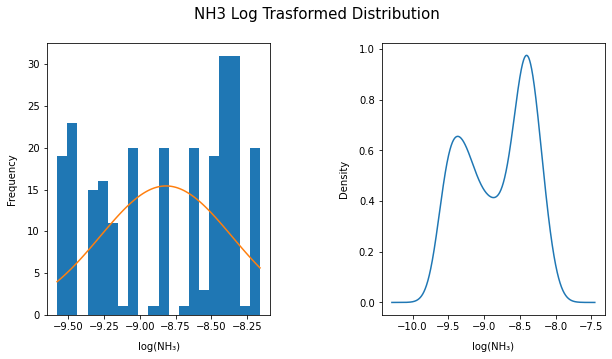

jarque bera test: not normally distributed, pvalue: 4.352282736144156e-06
lilliefors test: not normally distributed, pvalue: 0.0009999999999998899


In [21]:
# Log Transformation
nh3log = nh3.apply(np.log)

xlabel = ['log(NH3)'.translate(to_pedix), 'log(NH3)'.translate(to_pedix)]

plot_distributions(nh3log, 'NH3 Log Trasformed Distribution', xlabel)

jb, pvalue, sk, k = jarque_bera(nh3log)
print('jarque bera test: {}, pvalue: {}'.format('normally distributed' if pvalue > 0.05 else 'not normally distributed', pvalue))

ksstat, pvalue = lilliefors(nh3log)
print('lilliefors test: {}, pvalue: {}'.format('normally distributed' if pvalue > 0.05 else 'not normally distributed', pvalue))

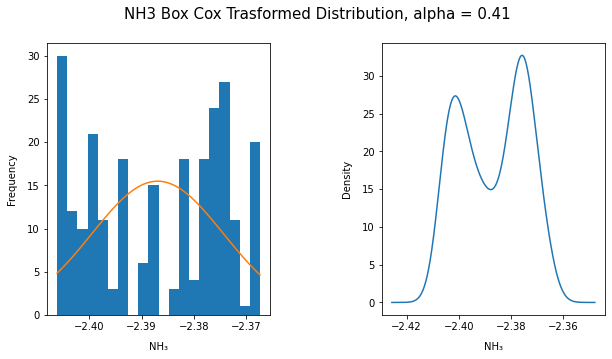

jarque bera test: not normally distributed, pvalue: 7.524892460138445e-06
lilliefors test: not normally distributed, pvalue: 0.0009999999999998899


In [22]:
# Box Cox Transformation
import pandas as pd
from scipy.stats import boxcox

nh3bc, alpha = boxcox(nh3)
nh3bc = pd.Series(nh3bc)

xlabel = ['NH3'.translate(to_pedix), 'NH3'.translate(to_pedix)]

plot_distributions(nh3bc, 'NH3 Box Cox Trasformed Distribution, alpha = {}'.format(round(alpha,2)), xlabel)

jb, pvalue, sk, k = jarque_bera(nh3bc)
print('jarque bera test: {}, pvalue: {}'.format('normally distributed' if pvalue > 0.05 else 'not normally distributed', pvalue))

ksstat, pvalue = lilliefors(nh3bc)
print('lilliefors test: {}, pvalue: {}'.format('normally distributed' if pvalue > 0.05 else 'not normally distributed', pvalue))

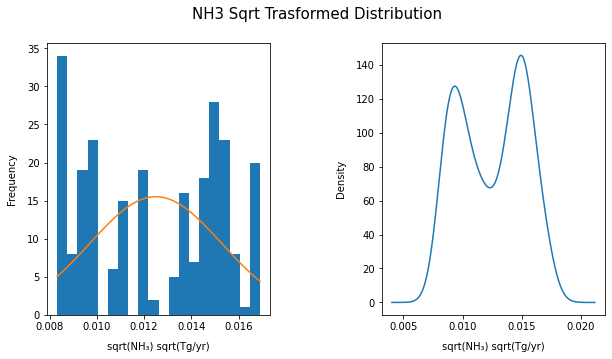

jarque bera test: not normally distributed, pvalue: 8.646253941078228e-06
lilliefors test: not normally distributed, pvalue: 0.0009999999999998899


In [10]:
# Squared Root Transformation

nh3sqrt = nh3.apply(np.sqrt)

xlabel = ['sqrt(NH3) sqrt(Tg/yr)'.translate(to_pedix), 'sqrt(NH3) sqrt(Tg/yr)'.translate(to_pedix)]

plot_distributions(nh3sqrt, 'NH3 Sqrt Trasformed Distribution', xlabel)

jb, pvalue, sk, k = jarque_bera(nh3sqrt)
print('jarque bera test: {}, pvalue: {}'.format('normally distributed' if pvalue > 0.05 else 'not normally distributed', pvalue))

ksstat, pvalue = lilliefors(nh3sqrt)
print('lilliefors test: {}, pvalue: {}'.format('normally distributed' if pvalue > 0.05 else 'not normally distributed', pvalue))

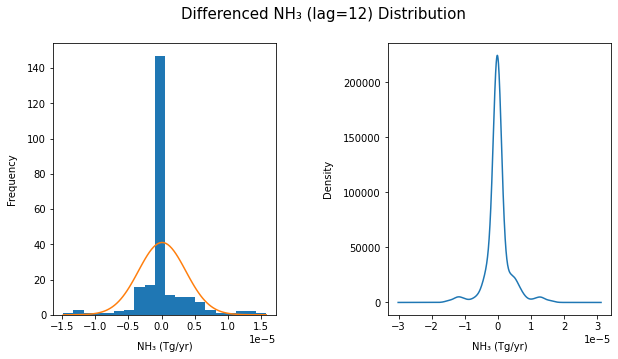

jarque bera test: not normally distributed, pvalue: 4.282042564011297e-81
lilliefors test: not normally distributed, pvalue: 0.0009999999999998899


In [24]:
# Remove Seasonality (year difference)

nh3_seasonal_diff= nh3[12:].values - nh3[:len(nh3)-12].values

xlabel = ['NH3 (Tg/yr)'.translate(to_pedix), 'NH3 (Tg/yr)'.translate(to_pedix)]
title = 'Differenced NH3 (lag=12) Distribution'.translate(to_pedix)

plot_distributions(pd.Series(nh3_seasonal_diff), title, xlabel)

jb, pvalue, sk, k = jarque_bera(nh3_seasonal_diff)
print('jarque bera test: {}, pvalue: {}'.format('normally distributed' if pvalue > 0.05 else 'not normally distributed', pvalue))

ksstat, pvalue = lilliefors(nh3_seasonal_diff)
print('lilliefors test: {}, pvalue: {}'.format('normally distributed' if pvalue > 0.05 else 'not normally distributed', pvalue))

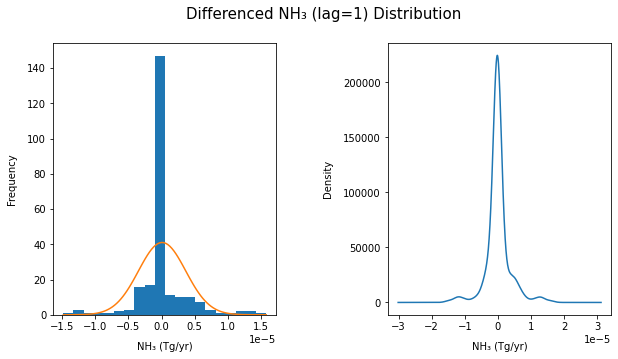

jarque bera test: not normally distributed, pvalue: 0.00011842507880647842
lilliefors test: not normally distributed, pvalue: 0.0009999999999998899


In [12]:
from statsmodels.tsa.statespace.tools import diff

nh3_diff= diff(nh3, 1)

xlabel = ['NH3 (Tg/yr)'.translate(to_pedix), 'NH3 (Tg/yr)'.translate(to_pedix)]

title = 'Differenced NH3 (lag=1) Distribution'.translate(to_pedix)

plot_distributions(pd.Series(nh3_diff), title, xlabel)

jb, pvalue, sk, k = jarque_bera(nh3_diff)
print('jarque bera test: {}, pvalue: {}'.format('normally distributed' if pvalue > 0.05 else 'not normally distributed', pvalue))

ksstat, pvalue = lilliefors(nh3_diff)
print('lilliefors test: {}, pvalue: {}'.format('normally distributed' if pvalue > 0.05 else 'not normally distributed', pvalue))

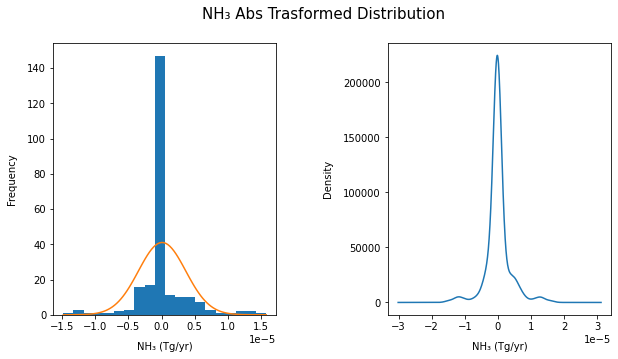

jarque bera test: normally distributed, pvalue: 0.18573335885601597
lilliefors test: not normally distributed, pvalue: 0.0009999999999998899


In [13]:
from statsmodels.tsa.statespace.tools import diff

nh3abs = nh3.apply(lambda x: np.abs(np.mean(nh3) - x))

xlabel = ['NH3 (Tg/yr)'.translate(to_pedix), 'NH3 (Tg/yr)'.translate(to_pedix)]
title = 'NH3 Abs Trasformed Distribution'.translate(to_pedix)

plot_distributions(pd.Series(nh3_seasonal_diff), title, xlabel)

jb, pvalue, sk, k = jarque_bera(nh3abs)
print('jarque bera test: {}, pvalue: {}'.format('normally distributed' if pvalue > 0.05 else 'not normally distributed', pvalue))

ksstat, pvalue = lilliefors(nh3abs)
print('lilliefors test: {}, pvalue: {}'.format('normally distributed' if pvalue > 0.05 else 'not normally distributed', pvalue))

H0 : coefficienti = 1 -> radici unitarie

In [14]:
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(nh3)

print('test: {}, pvalue: {}'.format('not stationary' if pvalue > 0.05 else 'stationary', pvalue))

test: not stationary, pvalue: 0.32744658149000805


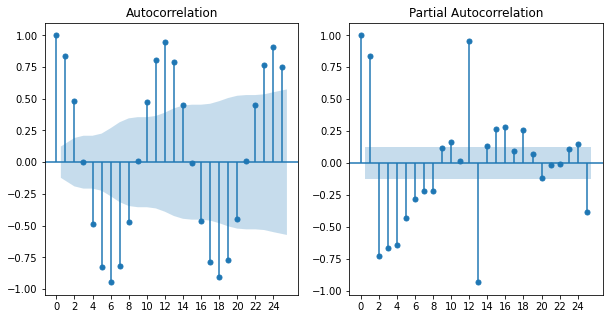

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

plot_acf(nh3, ax=axs[0])
axs[0].set_xticks(range(0,25,2))
plot_pacf(nh3, method='ols', ax=axs[1])
axs[1].set_xticks(range(0,25,2))

plt.show()

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

df = pd.DataFrame(data=nh3.values, index=pd.date_range(start=nh3.index[0], periods=len(nh3), freq='M'), columns=['nh3'])
decomposition = seasonal_decompose(df, model='additive')

Additive Decomposition: y ~ trend + seasonality + residuals 
Naive Decomposition

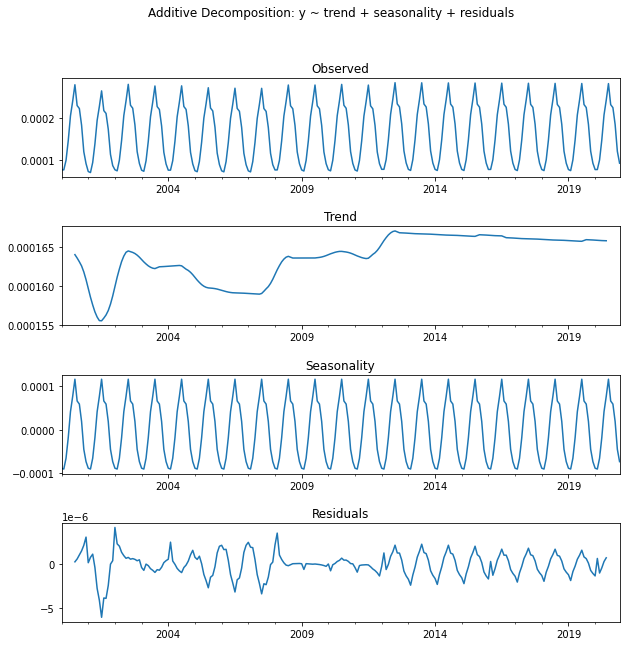

In [17]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10,10))
fig.suptitle('Additive Decomposition: y ~ trend + seasonality + residuals')
fig.subplots_adjust(hspace = 0.5)

axs[0].set_title('Observed')
decomposition.observed.plot(ax=axs[0])

axs[1].set_title('Trend')
decomposition.trend.plot(ax=axs[1])

axs[2].set_title('Seasonality')
decomposition.seasonal.plot(ax=axs[2])

axs[3].set_title('Residuals')
decomposition.resid.plot(ax=axs[3])

plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(decomposition.resid[decomposition.resid.notna()])

print('test: {}, pvalue: {}'.format('not stationary' if pvalue > 0.05 else 'stationary', pvalue))

test: stationary, pvalue: 4.168782189154845e-12


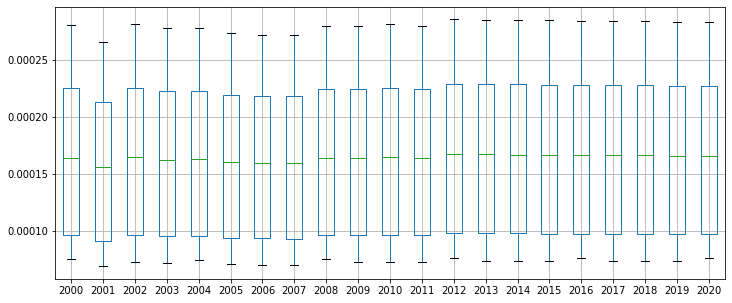

In [19]:
from pandas import Grouper, DataFrame

fig, ax = plt.subplots(figsize=(12,5))
groups = nh3.groupby(Grouper(freq='Y'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.boxplot()
plt.show()

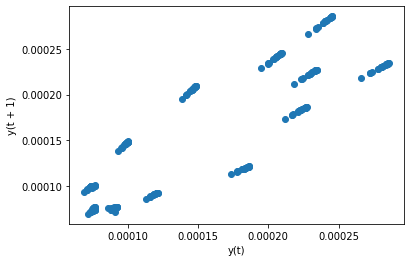

In [20]:
from pandas.plotting import lag_plot

lag_plot(nh3)
plt.show()

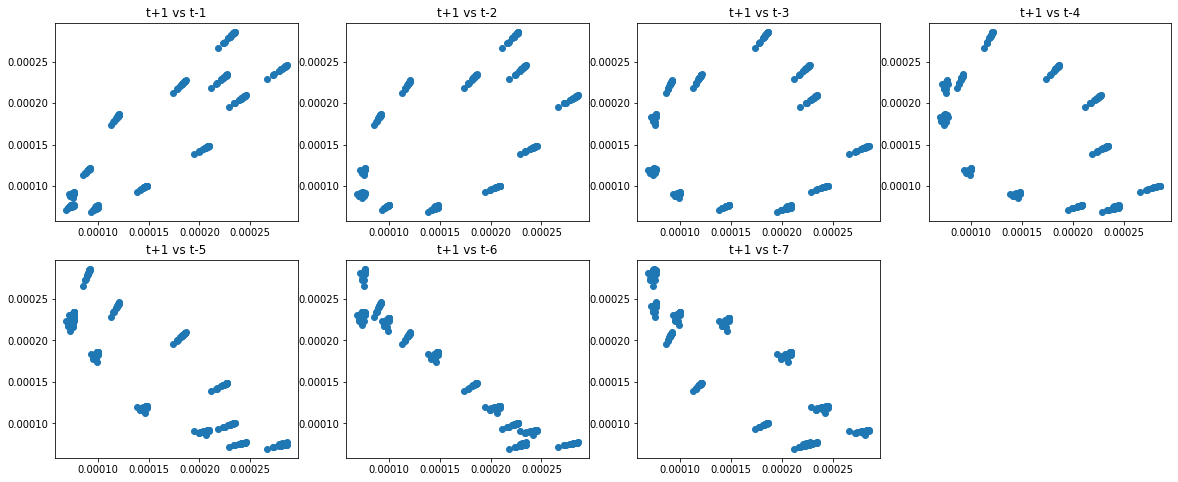

In [25]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas.plotting import scatter_matrix

values = DataFrame(nh3.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1, figsize=(20,8))
for i in range(1,(lags + 1)):
	ax = plt.subplot(240 + i)
	ax.set_title('t+1 vs t-' + str(i))
	plt.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)

plt.show()

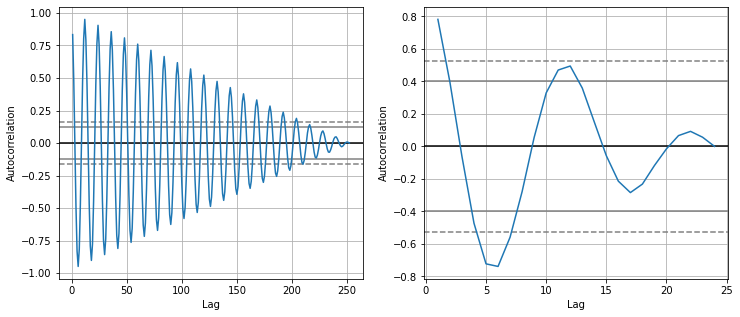

In [29]:
from pandas.plotting import autocorrelation_plot

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

autocorrelation_plot(nh3, ax=axs[0])
autocorrelation_plot(nh3[:24], ax=axs[1])

plt.show()